In [1]:
library(tidyverse)
library(readr)
library(ggplot2)

source("../../../spydr_scripts/functions/get_os.R")

ERROR: Error in library(tidyverse): there is no package called ‘tidyverse’


In [126]:
os <- get_os()
if (os == 'linux'){home <- '/home/krista/'
} else if(os == 'osx'){home <- '/Users/67981492/'}

data_path = paste0(home,
                  'Dropbox/volatileValues/simple_rt_experiment_probabilityC/data/')
agg_data_path = paste0(home, 
                       'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/')
setwd(data_path)

In [16]:
(files <- dir(path = data_path, pattern = "^[0-9](.*)(trialset(.*)[0-9].csv)$"))
n_cond = 4
n_sub = 24
length(files) == n_cond*n_sub

[1] "0761_cond0_trialset0.csv"  "0761_cond1_trialset0.csv" 
 [3] "0761_cond2_trialset0.csv"  "0761_cond3_trialset0.csv" 
 [5] "0762_cond0_trialset1.csv"  "0762_cond1_trialset1.csv" 
 [7] "0762_cond2_trialset1.csv"  "0762_cond3_trialset1.csv" 
 [9] "0763_cond0_trialset2.csv"  "0763_cond1_trialset2.csv" 
[11] "0763_cond2_trialset2.csv"  "0763_cond3_trialset2.csv" 
[13] "0764_cond0_trialset3.csv"  "0764_cond1_trialset3.csv" 
[15] "0764_cond2_trialset3.csv"  "0764_cond3_trialset3.csv" 
[17] "0765_cond0_trialset4.csv"  "0765_cond1_trialset4.csv" 
[19] "0765_cond2_trialset4.csv"  "0765_cond3_trialset4.csv" 
[21] "0766_cond0_trialset5.csv"  "0766_cond1_trialset5.csv" 
[23] "0766_cond2_trialset5.csv"  "0766_cond3_trialset5.csv" 
[25] "0767_cond0_trialset6.csv"  "0767_cond1_trialset6.csv" 
[27] "0767_cond2_trialset6.csv"  "0767_cond3_trialset6.csv" 
[29] "0768_cond0_trialset7.csv"  "0768_cond1_trialset7.csv" 
[31] "0768_cond2_trialset7.csv"  "0768_cond3_trialset7.csv" 
[33] "0769_cond0_trialset8.csv"  "0769_cond1_trialset8.csv" 
[35] "0769_cond2_trialset8.csv"  "0769_cond3_trialset8.csv" 
[37] "0770_cond0_trialset9.csv"  "0770_cond1_trialset9.csv" 
[39] "0770_cond2_trialset9.csv"  "0770_cond3_trialset9.csv" 
[41] "0771_cond0_trialset10.csv" "0771_cond1_trialset10.csv"
[43] "0771_cond2_trialset10.csv" "0771_cond3_trialset10.csv"
[45] "0772_cond0_trialset11.csv" "0772_cond1_trialset11.csv"
[47] "0772_cond2_trialset11.csv" "0772_cond3_trialset11.csv"
[49] "0773_cond0_trialset12.csv" "0773_cond1_trialset12.csv"
[51] "0773_cond2_trialset12.csv" "0773_cond3_trialset12.csv"
[53] "0774_cond0_trialset13.csv" "0774_cond1_trialset13.csv"
[55] "0774_cond2_trialset13.csv" "0774_cond3_trialset13.csv"
[57] "0775_cond0_trialset14.csv" "0775_cond1_trialset14.csv"
[59] "0775_cond2_trialset14.csv" "0775_cond3_trialset14.csv"
[61] "0776_cond0_trialset15.csv" "0776_cond1_trialset15.csv"
[63] "0776_cond2_trialset15.csv" "0776_cond3_trialset15.csv"
[65] "0777_cond0_trialset16.csv" "0777_cond1_trialset16.csv"
[67] "0777_cond2_trialset16.csv" "0777_cond3_trialset16.csv"
[69] "0778_cond0_trialset17.csv" "0778_cond1_trialset17.csv"
[71] "0778_cond2_trialset17.csv" "0778_cond3_trialset17.csv"
[73] "0779_cond0_trialset18.csv" "0779_cond1_trialset18.csv"
[75] "0779_cond2_trialset18.csv" "0779_cond3_trialset18.csv"
[77] "0780_cond0_trialset19.csv" "0780_cond1_trialset19.csv"
[79] "0780_cond2_trialset19.csv" "0780_cond3_trialset19.csv"
[81] "0781_cond0_trialset20.csv" "0781_cond1_trialset20.csv"
[83] "0781_cond2_trialset20.csv" "0781_cond3_trialset20.csv"
[85] "0782_cond0_trialset21.csv" "0782_cond1_trialset21.csv"
[87] "0782_cond2_trialset21.csv" "0782_cond3_trialset21.csv"
[89] "0783_cond0_trialset22.csv" "0783_cond1_trialset22.csv"
[91] "0783_cond2_trialset22.csv" "0783_cond3_trialset22.csv"
[93] "0784_cond0_trialset23.csv" "0784_cond1_trialset23.csv"
[95] "0784_cond2_trialset23.csv" "0784_cond3_trialset23.csv"

[1] TRUE

In [115]:
df <- files %>%
  map(read_csv,col_types = cols()) %>%
  reduce(rbind)      

In [116]:
#any reason that the cp recording of rt would be delayed by a trial? 
#cp itself is not delayed in implementation because accuracy dips exactly at cp
n_trials_per_s <- files %>%
  map(read_csv,col_types = cols()) %>%
  map(nrow) %>%
  reduce(rbind)      

In [127]:
condition <- map(files, substr, start=10, stop=10)
ID <- map(files, substr, start=2, stop=4)
df$condition <- unlist(mapply(rep, times = n_trials_per_s, x = condition))
df$ID <- unlist(mapply(rep, times = n_trials_per_s, x = ID))
df$trial <- unlist(mapply(seq, 1, n_trials_per_s))

In [256]:
head(df$decoded_condition == 1)

[1]  TRUE FALSE FALSE FALSE FALSE FALSE

In [229]:
#mark first and last trials as cps 
#actually don't need to mark last trial because idx + n is the key thing
#actually can't use the first epoch because no previous trials... 
# df[df$trial == 1 & df$cp_with_slow_fast == 0,] = 1 

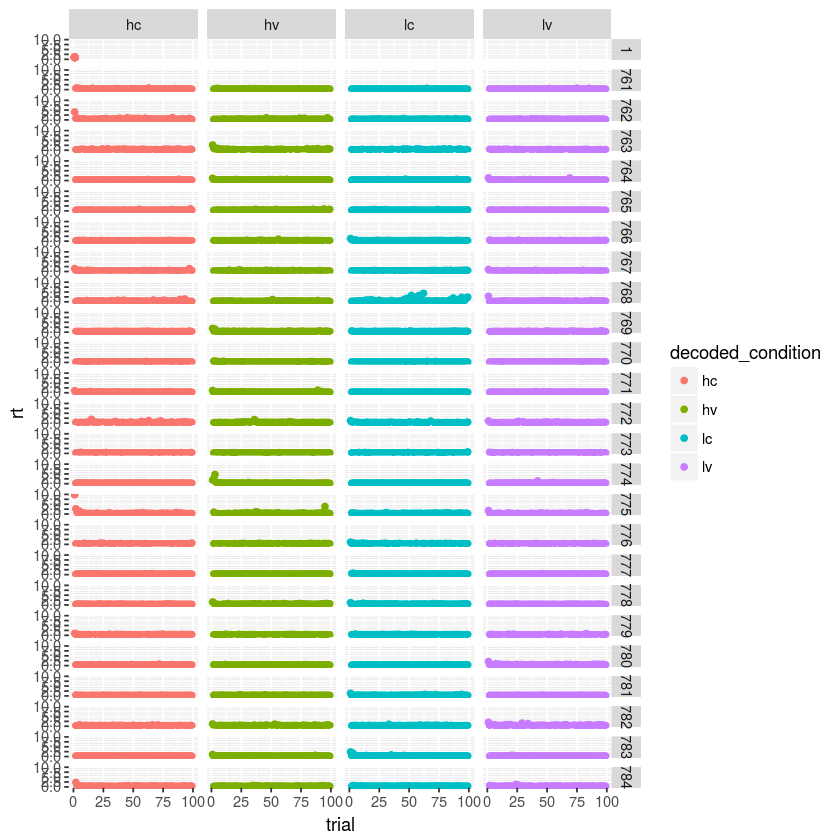

In [285]:
#note that when plotting against trial, will plot real trial, not repeat (700 instead of 600 for ex.)
#find a way around this by marking repeated trials with original trial number 
ggplot(subset(df, trial < 100), aes(trial, rt, color=decoded_condition)) + geom_point()+ facet_grid(ID~decoded_condition)

In [266]:
ggplot(subset(df, cp_with_slow_fast > -1), aes(trial, rt, color=decoded_condition)) + stat_summary(fun.data = "mean_cl_boot", geom = "smooth", aes(fill=decoded_condition)) + stat_summary(fun.data = "mean_cl_boot", geom = "point", aes(fill=decoded_condition)) +  facet_grid(decoded_condition~.)

In [230]:
library(reshape2)
start_cp_idx = df[df$cp_with_slow_fast == 1,'trial'] 
start_cp_idx = unlist(start_cp_idx - 3)

end_cp_idx = unlist(start_cp_idx + 11)
epoch_idx = melt(data.frame(unlist(mapply(":", start_cp_idx, end_cp_idx))))
# len_idx = length(epoch_idx[0])
# n_epochs = len(epoch_idx)


No id variables; using all as measure variables


In [ ]:
#figure out how to get the relevant windows and name epoch idx 

In [246]:
colnames(epoch_idx) <- c('_', 'trial')
colnames(epoch_idx)

[1] "_"     "trial"

In [247]:
table <- merge(epoch_idx, df, by = "trial")

In [259]:
#condition codes from experimental script
# if condition == 0:
#         exp_param_file = exp_param_directory + 'lc_' + trialfile_n + '.csv'
#     elif condition == 1:
#         exp_param_file = exp_param_directory + 'hc_' + trialfile_n + '.csv'
#     elif condition == 2:
#         exp_param_file = exp_param_directory + 'hv_' + trialfile_n + '.csv'
#     elif condition == 3:
#         exp_param_file = exp_param_directory + 'lv_' + trialfile_n + '.csv'

#decode conditions
df$decoded_condition <- recode(df$condition,
  '0' = 'lc',
  '1' = 'hc',
  '2' = 'hv',
  '3' = 'lv', 
  )
#check decoding
df$decoded_condition[0:5]; df$condition[0:5]

[1] "hc" "lc" "lc" "lc" "lc"

[1] "1" "0" "0" "0" "0"

In [119]:
dim(df); head(df,2)

[1] 58379    14

choice,accuracy,solution,reward,cumulative_reward,rt,total_trial_time,iti,cp_with_slow_fast,obs_cp_with_slow_fast,high_val_cue,condition,ID,decoded_condition
1,0,0,0,599,0.4336741,1.697924,0.2664002,0,0,112,0,761,lc
1,0,0,0,598,0.3079350,1.724732,0.4243499,0,0,112,0,761,lc


In [124]:
# write.csv(df, paste0(agg_data_path, "raw_data_test.csv"))